#### Explain methodology and terminology used

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc

In [5]:
data = pd.read_csv('~/Downloads/DataSets/120-years-of-olympic-history-athletes-and-results/athlete_events.csv')
noc = pd.read_csv('~/Downloads/DataSets/120-years-of-olympic-history-athletes-and-results/noc_regions.csv')

After reading data sets it comes natural to take a sneak peek at it, but as number of rows is too huge, only taking a look at top few rows to get the basic insight on data should be enough

In [6]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


We can see columns,data structure and also notice data types easily.
But to get the actual data types, non-null data using info method would be more appropriate.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


The basic and most important information about our data/columns is displayed. This helps us to in determinining better and appropriate techniques to use on different types of data

In [13]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


Describe function shows us the basic statistical values of numeral columns in the data set

#### Now let's dig in

Let's start by checking **Participation of different countires** in Olympics (1896 - 2016)

In [12]:
per_country_participation = data['NOC'].value_counts()

In [13]:
#p = sns.barplot(x=per_country_participation.index,y=per_country_participation.values,orient='h')

#Orient parameter here should have resolveed the xlabel overlapping issue but it was generating a weird error that,
#so far, I have been unable to resolve.

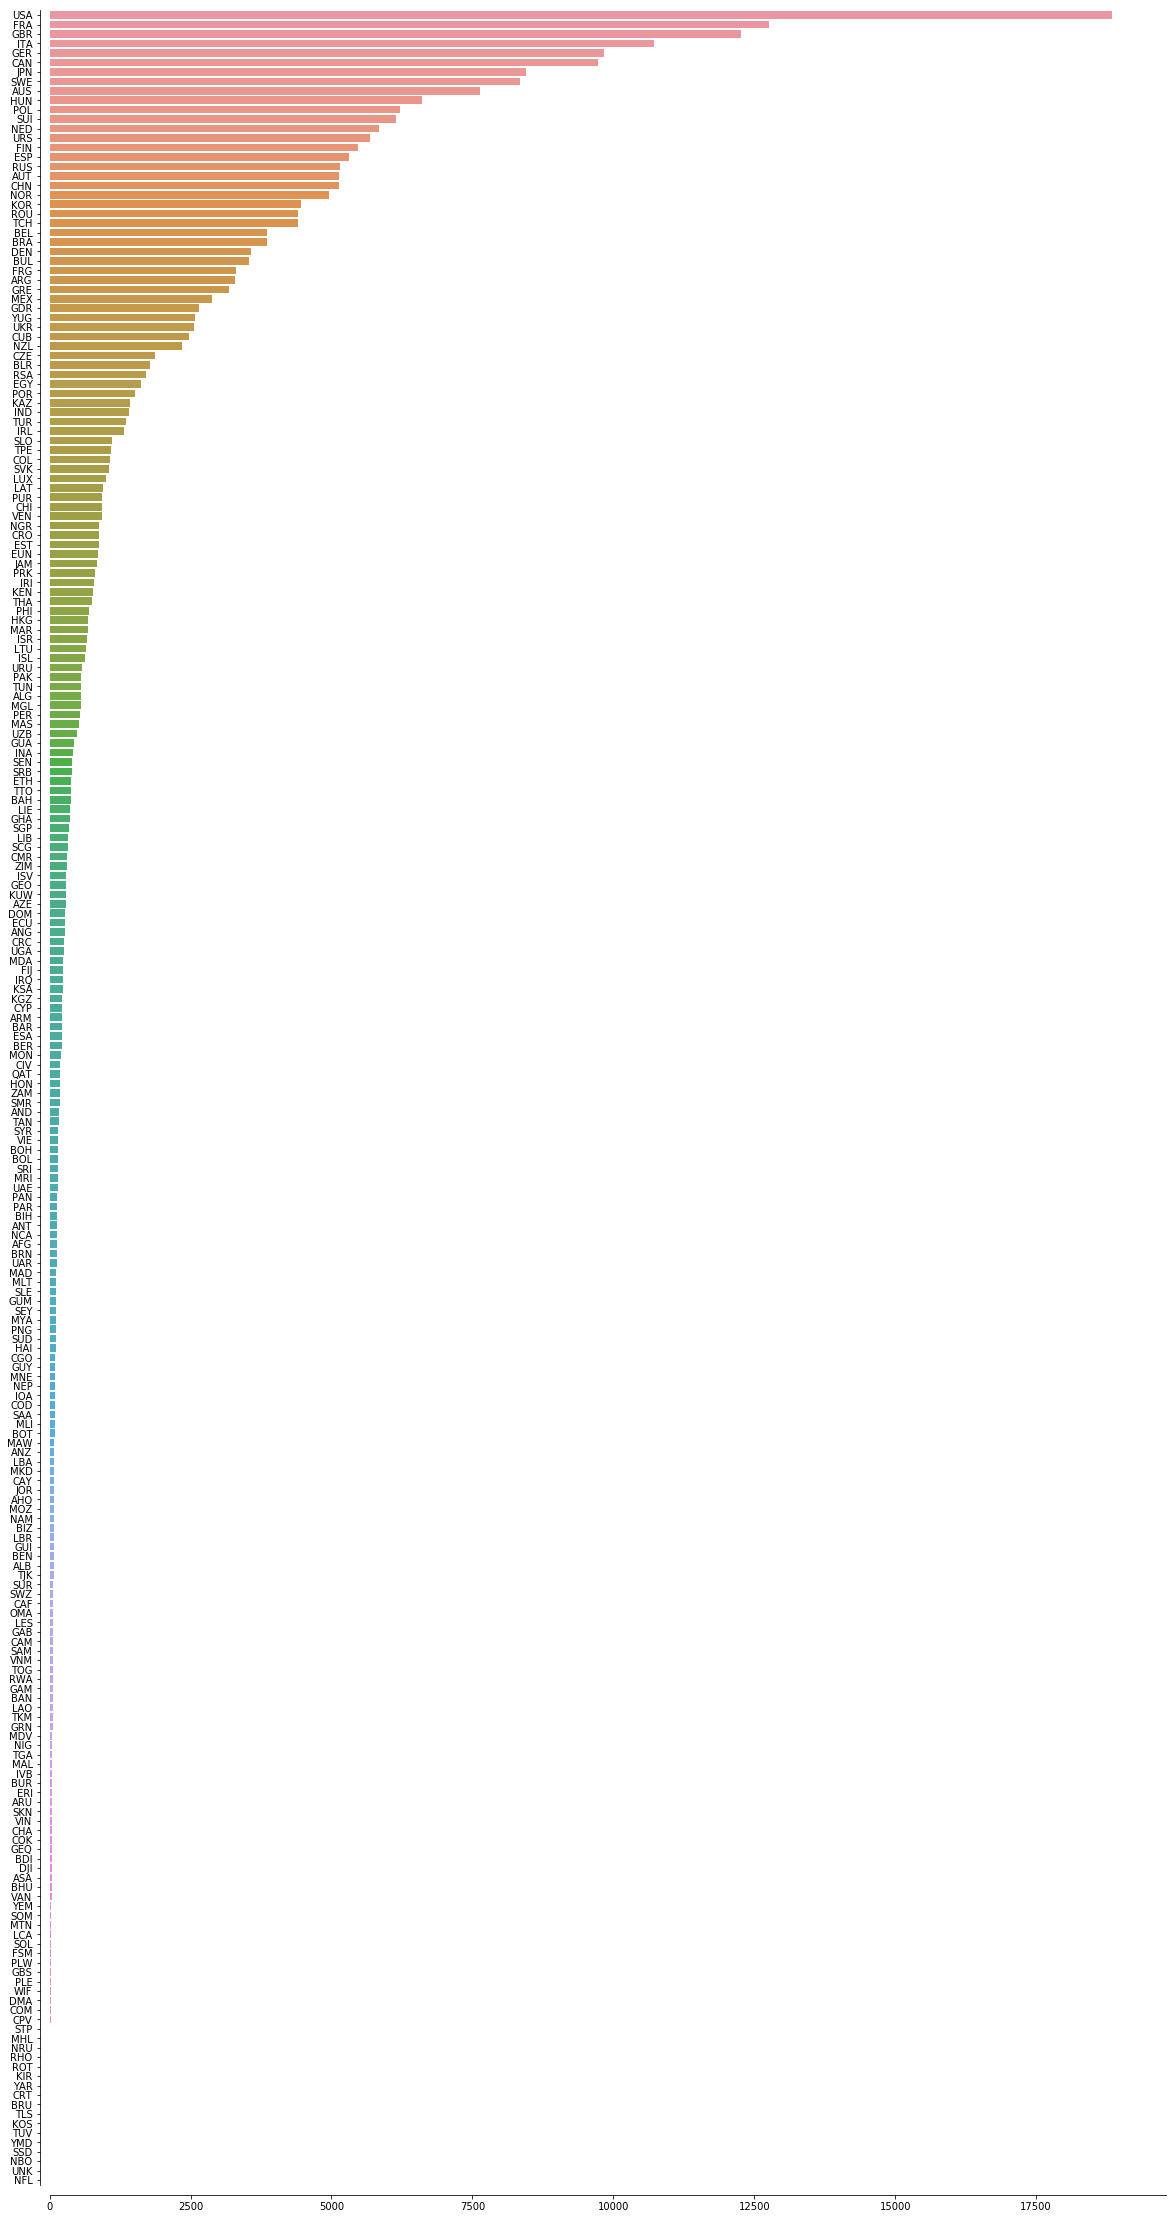

In [14]:
plt.figure(figsize=(20,40))
sns.barplot(y=per_country_participation.index,x=per_country_participation.values)
sns.despine(offset=10)

###### What did I extract!
As clearly seen from the graph the most participating country in Olympics is USA, followed by France > Britain and so on to NFL (New Found Land (Canada)) being the lowest participator.

###### Medals won by countries

Let's see which countries won maximum medals over the specified period of Olympics

In [70]:
medal_distribution_by_country = data.groupby('NOC')['Medal'].count()
#medal_distribution_by_country.idxmax()

In [71]:
# Filtering out countries who have won no medal so far
medal_distribution_by_country = medal_distribution_by_country[medal_distribution_by_country > 0]

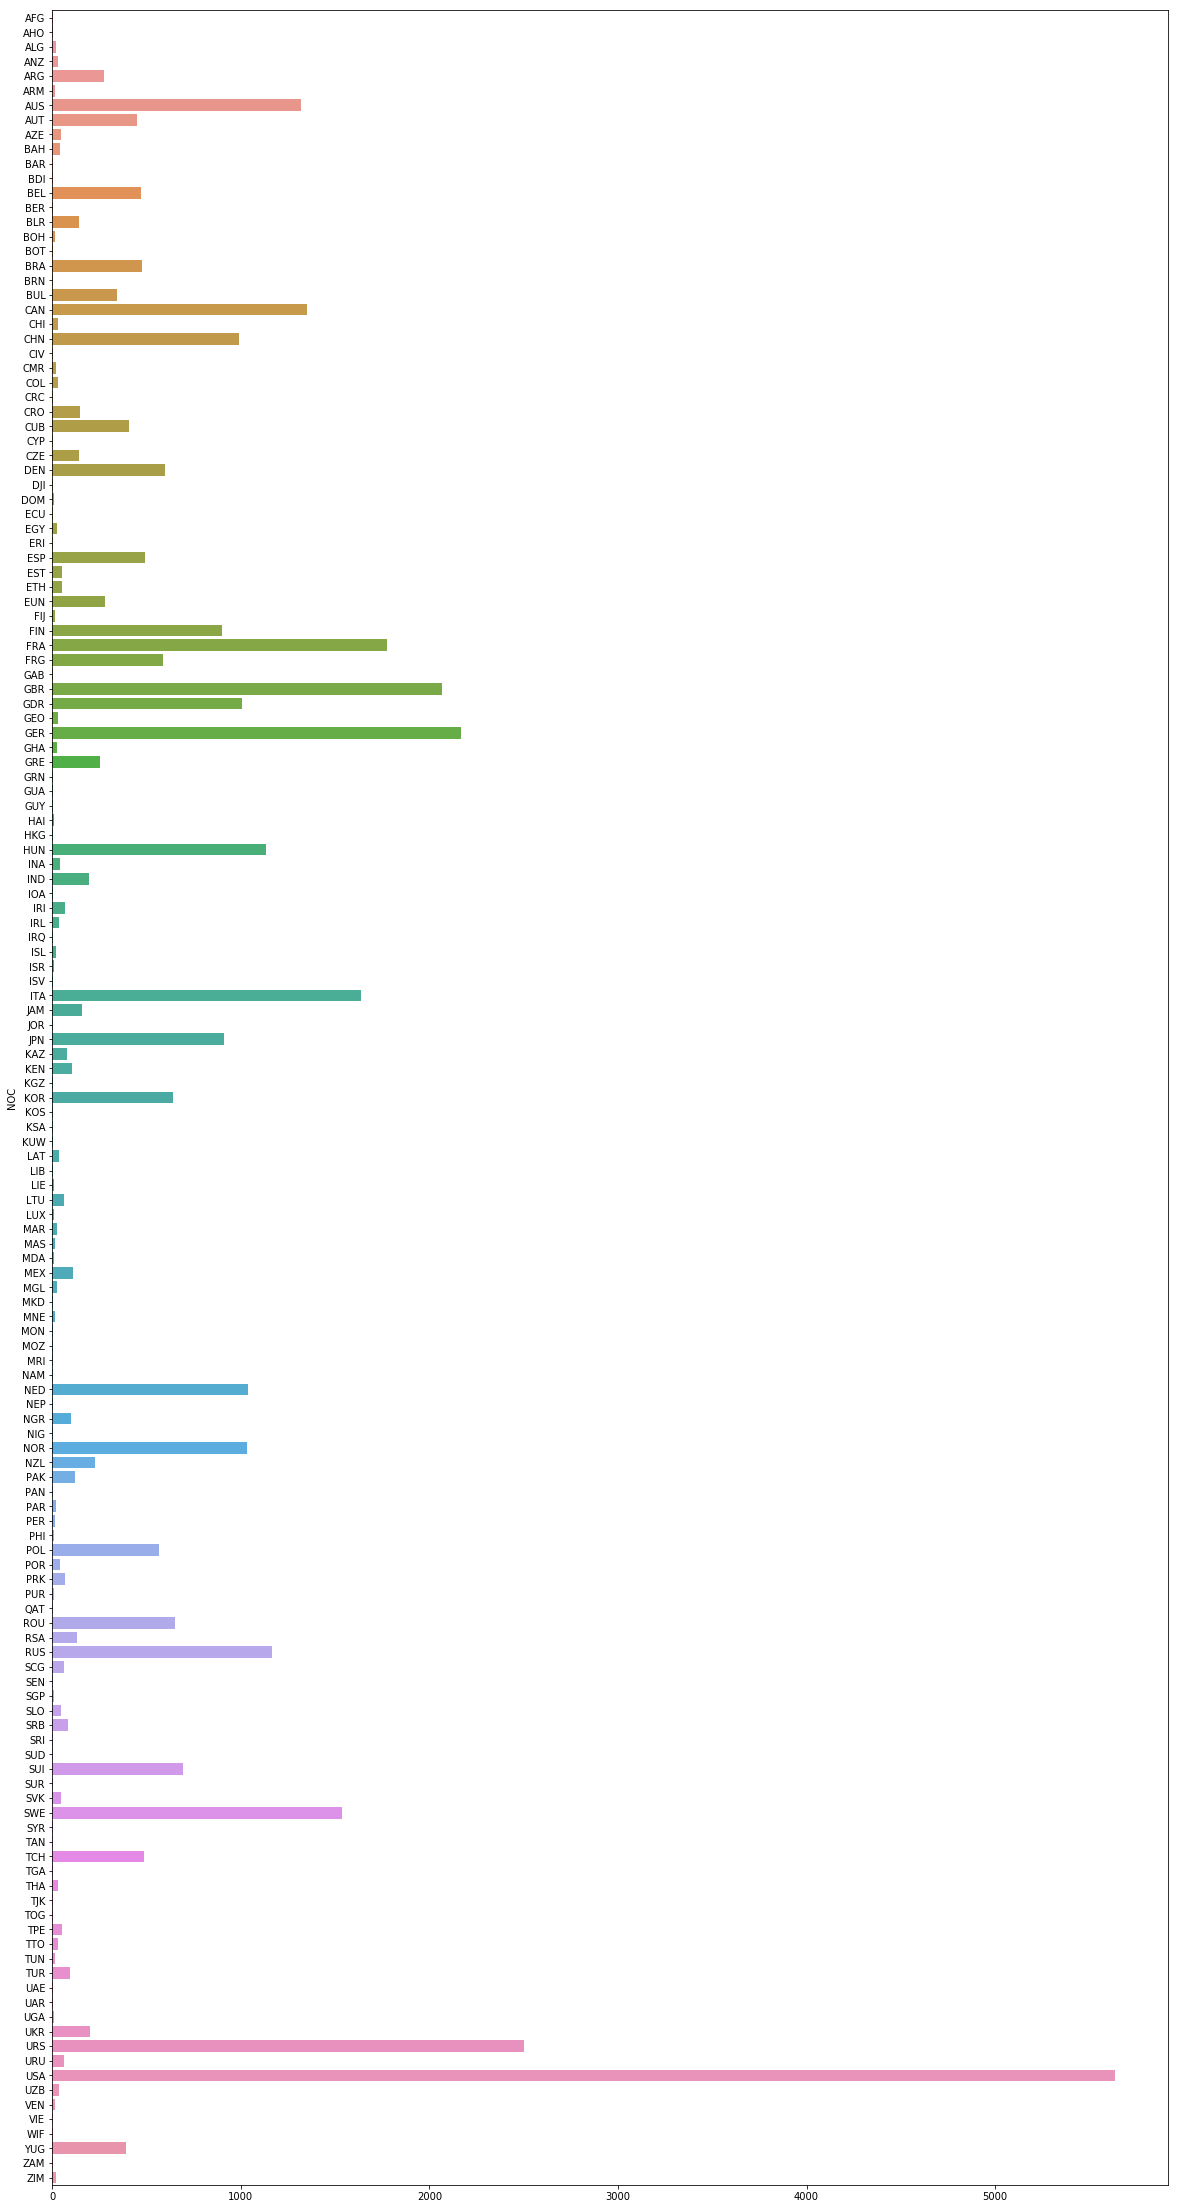

In [72]:
plt.figure(figsize=(20,40))
sns.barplot(y=medal_distribution_by_country.index,x=medal_distribution_by_country.values)

In [22]:
per_person_participation.Bronze + per_person_participation.Gold + per_person_participation.Silver

39783

In [ ]:
sns.barplot(y=per_person_participation.index,x=per_person_participation.values)
print ('done')

# Country by country, yearly participation pattern